In [17]:
# Build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. 
# To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the 
# fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified 
# in exchange for prosecution immunity.

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import matplotlib.pyplot
import numpy as np
import pandas as pd

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 
                 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 
                 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 
                 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person'] 
# I'm starting out by using all features because I don't know which features are most important yet, and I don't want to
# accidentally throw an important feature out. 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print "Total number of data points : ", sum([1 for key in data_dict.keys()])
print "Total number of poi : ", sum([1 for key in data_dict.keys() if data_dict[key]['poi']])
print "Total number of non-poi : ", sum([1 for key in data_dict.keys() if not data_dict[key]['poi']])
                                                   
def count_features(feature):
    print feature, sum([1 for key in data_dict.keys() if data_dict[key][feature] == 'NaN'])
    
print "Total number of data points with missing values :"
for j in features_list:
    print count_features(j)


Total number of data points :  146
Total number of poi :  18
Total number of non-poi :  128
Total number of data points with missing values :
poi 0
None
salary 51
None
to_messages 60
None
deferral_payments 107
None
total_payments 21
None
exercised_stock_options 44
None
bonus 64
None
restricted_stock 36
None
shared_receipt_with_poi 60
None
restricted_stock_deferred 128
None
total_stock_value 20
None
expenses 51
None
loan_advances 142
None
from_messages 60
None
other 53
None
from_this_person_to_poi 60
None
director_fees 129
None
deferred_income 97
None
long_term_incentive 80
None
from_poi_to_this_person 60
None


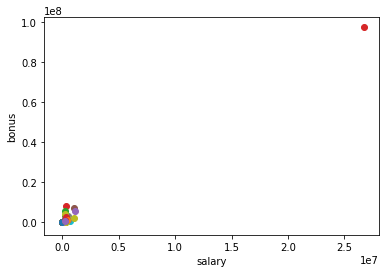

TOTAL salary : 26704229 bonus : 97343619


In [18]:
### Task 2: Remove outliers
# visually look at salary to see if there are any apparent outliers

data = featureFormat(data_dict, features_list)

### your code below
for point in data:
    salary = point[1]
    bonus = point[6]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# there seems to be one outlier with a very high salary and bonus
for k,v in data_dict.iteritems(): 
    if data_dict[k]['bonus'] > 700000 and data_dict[k]['salary'] > 2000000 and data_dict[k]['salary'] != 'NaN' \
    and data_dict[k]['bonus'] != 'NaN':
        print k, 'salary :', data_dict[k]['salary'] , 'bonus :',data_dict[k]['bonus']

# TOTAL is the total sum of all data values for every person, shouldn't be included in the data set.  

#
enron_data.replace(to_replace='NaN', value=0.0, inplace=True)


In [19]:
# for each employee, print the number of features with the value of NaN if it is unusually high. Total number of features is 20.
for k,v in data_dict.iteritems():
    count = 0
    for i,j in v.iteritems():
        # change NaN to 0
        if j == 'NaN':
            count +=1
            data_dict[k][i] = 0
    if count > 17:
        print k, count    
print 'WHALEY DAVID A', data_dict['WHALEY DAVID A']
print 'WROBEL BRUCE', data_dict['WROBEL BRUCE']
print 'LOCKHART EUGENE E', data_dict['LOCKHART EUGENE E']
print 'THE TRAVEL AGENCY IN THE PARK', data_dict['THE TRAVEL AGENCY IN THE PARK']
print 'GRAMM WENDY L', data_dict['GRAMM WENDY L']

# 'LOCKHART EUGENE E' does not have any valid data points, so it can be removed. 
# 'THE TRAVEL AGENCY IN THE PARK' doesn't seem like it is an actual person, so it also can be removed.

WHALEY DAVID A 18
WROBEL BRUCE 18
LOCKHART EUGENE E 20
THE TRAVEL AGENCY IN THE PARK 18
GRAMM WENDY L 18
WHALEY DAVID A {'salary': 0, 'to_messages': 0, 'deferral_payments': 0, 'total_payments': 0, 'exercised_stock_options': 98718, 'bonus': 0, 'restricted_stock': 0, 'shared_receipt_with_poi': 0, 'restricted_stock_deferred': 0, 'total_stock_value': 98718, 'expenses': 0, 'loan_advances': 0, 'from_messages': 0, 'other': 0, 'from_this_person_to_poi': 0, 'poi': False, 'director_fees': 0, 'deferred_income': 0, 'long_term_incentive': 0, 'email_address': 0, 'from_poi_to_this_person': 0}
WROBEL BRUCE {'salary': 0, 'to_messages': 0, 'deferral_payments': 0, 'total_payments': 0, 'exercised_stock_options': 139130, 'bonus': 0, 'restricted_stock': 0, 'shared_receipt_with_poi': 0, 'restricted_stock_deferred': 0, 'total_stock_value': 139130, 'expenses': 0, 'loan_advances': 0, 'from_messages': 0, 'other': 0, 'from_this_person_to_poi': 0, 'poi': False, 'director_fees': 0, 'deferred_income': 0, 'long_term_

In [20]:
#remove the outliers
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 0,
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 0,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 0,
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 0,
 'to_messages': 0,
 'total_payments': 309886585,
 'total_stock_value': 434509511}

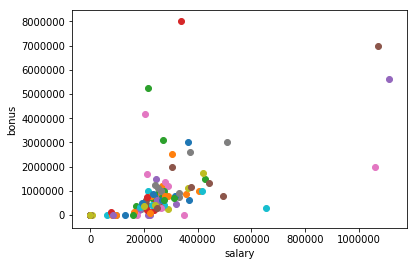

In [21]:
data = featureFormat(data_dict, features_list)
### your code below
for point in data:
    salary = point[1]
    bonus = point[6]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# the data looks way better now. There are a few more data points that look like outliers, but I want to keep them as they are
# probably the people of interest.

In [67]:
### Task 3: Create new feature(s)

# Using my intuition, I'm thinking that the people we want to look at would have an unusually high ratio of salary 
# + bonus over total payments. Lastly, there would be an usually high number of emails between the people of interest and
# shared receipts of email. 
from sklearn.feature_selection import SelectKBest, f_classif

for key in data_dict:

    bonus = data_dict[key]["bonus"]
    salary = data_dict[key]["salary"]
    salary_bonus = data_dict[key]["salary"] + data_dict[key]["bonus"]
    total_payments = data_dict[key]["total_payments"]
    total_stock_value = data_dict[key]["total_stock_value"]
    to_messages = data_dict[key]["to_messages"]
    from_messages = data_dict[key]["from_messages"]
    from_poi = data_dict[key]["from_poi_to_this_person"]
    to_poi = data_dict[key]["from_this_person_to_poi"]
    cc = data_dict[key]['shared_receipt_with_poi']
    exercised_stock = data_dict[key]['exercised_stock_options']

    if bonus != 0:
        data_dict[key]['bonus_ratio'] = round((bonus/float(total_payments)), 5)
    else:
        data_dict[key]['bonus_ratio'] = 0
    if salary != 0:
        data_dict[key]['salary_ratio'] = round((salary/float(total_payments)), 5)
    else:
        data_dict[key]['salary_ratio'] = 0
    if bonus != 0 and salary !=0:
        data_dict[key]['pay_ratio'] = round((data_dict[key]['bonus_ratio'] + data_dict[key]['salary_ratio']/2), 5)
    else: 
        data_dict[key]['pay_ratio'] = 0
    if total_stock_value != 0:
        pay = bonus + salary
        data_dict[key]['pay_stock_ratio'] = round((bonus+salary)/float(total_stock_value), 5)
    else: 
        data_dict[key]['pay_stock_ratio'] = 0
    if exercised_stock != 0 and total_stock_value != 0:
        data_dict[key]['exercised_stock_ratio'] = round((exercised_stock/float(total_stock_value)), 5)
    else:
        data_dict[key]['exercised_stock_ratio'] = 0
    if to_poi != 0 and to_messages != 0:
        data_dict[key]['email_to_poi_ratio'] = round(to_poi/float(to_messages), 2)
    else: 
        data_dict[key]['email_to_poi_ratio'] = 0
    if from_poi != 0 and from_messages != 0:
        data_dict[key]['email_from_poi_ratio'] = round(from_poi/float(from_messages), 2)
    else: 
        data_dict[key]['email_from_poi_ratio'] = 0
    if cc != 0 and from_messages != 0:
        data_dict[key]['cc_with_poi_ratio'] = round(cc/float(from_messages), 2)
    else: 
        data_dict[key]['cc_with_poi_ratio'] = 0


In [68]:
features_list = ['salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 
                 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 
                 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 
                 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'bonus_ratio',
                 'salary_ratio', 'pay_ratio', 'pay_stock_ratio', 'exercised_stock_ratio', 
                 'email_to_poi_ratio', 'email_from_poi_ratio', 'cc_with_poi_ratio']  

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [81]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from time import time
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the 
# training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can 
# check the results you get
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Some of the values of the features are quite different (salary vs number of emails), so I will perform feature scaling to
# normalize the values.

def featureScalingNumpy(arr):
    new_list = []
    data = np.asarray(arr, dtype = float)
    range = data.max() - data.min()
    with np.errstate(divide='ignore'):
        #vectorized operations, data means each value in array
        result = data - data.min()/range
        result[range == 0] = 0.5
    return result
features_train_scaled = featureScalingNumpy(features_train)

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k='all')
selector.fit(features_train_scaled, labels_train)
new_selector = selector.transform(features_train_scaled)
print "Score: ", selector.scores_
pval = -np.log10(selector.pvalues_)
print "P-value: ", pval

mask = selector.get_support(indices=True)
for index in mask:
    print features_list[index]

# the features with the ten highest scores: from_messages, deferral_payments, exercised_stock_options, deferred income,
# bonus, loan_advances, other, restricted_stock_deferred, long_term_incentive, restricted_stock, total_payments,
# from_poi_to_this_person, to_messages, salary, from_this_person_to_poi, cc_with_poi_ratio, shared_receipt_with_poi', 
# email_from_poi_ratio, salary_ratio, pay_stock_ratio, email_to_poi_ratio, total_stock_value

Score:  [  2.48716212e+01   2.80949114e+01   1.73615175e+03   3.55939474e+01
   4.49021229e+02   1.27192800e+02   3.96982933e+01   8.13395482e+00
   5.25714899e+01   1.46442016e+00              inf   1.11568026e+02
   2.64324333e+03   9.61723598e+01   1.42383283e-01   1.96077602e+02
   4.31675627e+01   3.50462323e+01   2.18721120e+02   8.34507220e+01
   1.70812969e+02   4.68214465e+01   5.94114759e-01   4.50395941e+01
   6.89088057e+00   9.42009343e+00]
P-value:  [  1.62125810e+01   1.70643350e+01   4.71425621e+01   1.87328465e+01
   3.71756290e+01   2.79226280e+01   1.95081888e+01   8.80005458e+00
   2.15171330e+01   9.45273519e-01              inf   2.69665782e+01
   5.02438043e+01   2.58854116e+01   5.01156163e-12   3.10888155e+01
   2.01055391e+01   1.86229431e+01   3.18900901e+01   2.48545959e+01
   3.00783802e+01   2.06864656e+01   1.58792898e-02   2.04088725e+01
   7.79413859e+00   9.71668143e+00]
salary
to_messages
deferral_payments
total_payments
exercised_stock_options
bonus


C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


In [78]:
clf1 = GaussianNB()
clf1.fit(features, labels)
print "Overfit :", clf1.score(features, labels)

clf_NB = GaussianNB()
t0=time()
clf_NB.fit(features_train, labels_train)
print "training time:", round(time()-t0,3), "s"
t1=time()
pred = clf_NB.predict(features_test)
print "prediction time:", round(time()-t1,3), "s"
print "After split :", clf_NB.score(features_test, labels_test)

target_names = ["Not POI", "POI"]
print classification_report(y_true=labels_test, y_pred=pred, target_names=target_names)

# After splitting the data into training and test sets, the accuracy of the Naive Bayes classifier is 0.35. I will try another 
# classifier later and see if the accuracy will be higher.

# Looking at the scores, I think that the features with the smallest scores can be removed

#F-score reveals the discriminative power of each feature independently from others. One score is computed for the first 
#feature, and another score is computed for the second feature. But it does not indicate anything on the combination of both 
#features (mutual information). This is the main weakness of F-score.

Overfit : 1.0
training time: 0.016 s
prediction time: 0.0 s
After split : 0.348837209302
             precision    recall  f1-score   support

    Not POI       0.75      1.00      0.86        15
        POI       0.00      0.00      0.00         1

avg / total       0.26      0.35      0.30        43



In [80]:
# Now I'm going to try decision tree.

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split = 40)
t0=time()
clf_dt.fit(features_train, labels_train)
print "training time:", round(time()-t0,3), "s"
t1=time()
pred_dt = clf_dt.predict(features_test)
print "prediction time:", round(time()-t1,3), "s"
accuracy = accuracy_score(pred_dt, labels_test)
print accuracy

# the accuracy is slightly less than Naive Bayes.

training time: 0.0 s
prediction time: 0.0 s
0.348837209302


In [ ]:
# Now I'm going to try PCA to aide in feature selection

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

n_components = 20
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(features_train)
pca.explained_variance_ratio_

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [ ]:
pipeline = Pipeline(steps=[('MinMaxScaler', scaler), ('SelectKBest', selector), ('pca', pca), ('GaussianNB', clf_NB)])

# for GridSearchCV you precede the parameter names with the names
# in the steps of your pipeline, followed by 2 underscores
parameters = {'SelectKBest__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20],
              'pca__n_components':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20]}

# choose a validation method for GridSearch CV:
sss = StratifiedShuffleSplit(labels, 1000, random_state = 42)

gs = grid_search.GridSearchCV(pipeline, parameters, scoring='f1', cv=sss)

# if you use StratifiedShuffleSplit, you fit all of the data:
gs.fit(features, labels)

# the GridSearch scores are given by
scores = gs.grid_scores_

# Extract the scores from 'scores' that you want for your heat map

# The optimal model selected by GridSearchCV
best_clf = gs.best_estimator_

print '\nGridSearchCV Best Estimator'
print best_clf